In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('outputwithoutvybr.xlsx')
df

,Unnamed: 0,id,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,...,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто,is_vybr,agecat,int_cat
0,0,0,1889,Москва,Москва,50,M,2023-04-01 00:00:00,18993.0,99900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
1,1,1,1889,Москва,Москва,50,M,2023-05-01 00:00:00,37807.0,92424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
2,2,2,1889,Москва,Москва,50,M,2023-06-01 00:00:00,20791.0,124800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
3,3,3,1889,Москва,Москва,50,M,2023-07-01 00:00:00,131129.0,18060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
4,4,4,1889,Москва,Москва,50,M,2023-08-01 00:00:00,44096.0,198480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59821,59821,59821,1005319581,Москва,Москва,37,NaN,2023-05-01 00:00:00,657.0,54375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1
59822,59822,59822,1005319581,Москва,Москва,37,NaN,2023-06-01 00:00:00,NaN,128070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1
59823,59823,59823,1005319581,Москва,Москва,37,NaN,2023-07-01 00:00:00,5919.0,26085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1
59824,59824,59824,1005319581,Москва,Москва,37,NaN,2023-08-01 00:00:00,1705.0,111690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1


In [3]:
df = df[df['is_vybr'] == 0]
df

,Unnamed: 0,id,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,...,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто,is_vybr,agecat,int_cat
0,0,0,1889,Москва,Москва,50,M,2023-04-01 00:00:00,18993.0,99900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
1,1,1,1889,Москва,Москва,50,M,2023-05-01 00:00:00,37807.0,92424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
2,2,2,1889,Москва,Москва,50,M,2023-06-01 00:00:00,20791.0,124800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
3,3,3,1889,Москва,Москва,50,M,2023-07-01 00:00:00,131129.0,18060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
4,4,4,1889,Москва,Москва,50,M,2023-08-01 00:00:00,44096.0,198480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59815,59815,59815,1003493065,Республика Карелия,Петрозаводск,42,M,2023-05-01 00:00:00,18228.0,153096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59816,59816,59816,1003493065,Республика Карелия,Петрозаводск,42,M,2023-06-01 00:00:00,24807.0,163884.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59817,59817,59817,1003493065,Республика Карелия,Петрозаводск,42,M,2023-07-01 00:00:00,16195.0,143451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59818,59818,59818,1003493065,Республика Карелия,Петрозаводск,42,M,2023-08-01 00:00:00,23215.0,88242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2


In [4]:
categories = []
for i in df.columns:
  if i.startswith('оборот_'):
    categories.append(i[7:])
categories

['аптеки',
 'рестораны',
 'одежда_и_обувь',
 'автоуслуги',
 'супермаркеты',
 'такси',
 'красота',
 'развлечения',
 'жд_билеты',
 'образование',
 'дом_и_ремонт',
 'спорттовары',
 'животные',
 'цветы',
 'фастфуд',
 'каршеринг',
 'аренда_авто']

In [5]:
for i in ['оборот_аптеки', 'оборот_рестораны',
       'оборот_одежда_и_обувь', 'оборот_автоуслуги', 'оборот_супермаркеты',
       'оборот_такси', 'оборот_красота', 'оборот_развлечения',
       'оборот_жд_билеты', 'оборот_образование', 'оборот_дом_и_ремонт',
       'оборот_спорттовары', 'оборот_животные', 'оборот_цветы',
       'оборот_фастфуд', 'оборот_каршеринг', 'оборот_аренда_авто','кэшбэк_аптеки', 'кэшбэк_рестораны',
       'кэшбэк_одежда_и_обувь', 'кэшбэк_автоуслуги', 'кэшбэк_супермаркеты',
       'кэшбэк_такси', 'кэшбэк_красота', 'кэшбэк_развлечения',
       'кэшбэк_жд_билеты', 'кэшбэк_образование', 'кэшбэк_дом_и_ремонт',
       'кэшбэк_спорттовары', 'кэшбэк_животные', 'кэшбэк_цветы',
       'кэшбэк_фастфуд', 'кэшбэк_каршеринг', 'кэшбэк_аренда_авто']:
    df[i] = df[i].fillna(0)

<ipython-input-5-dd360c98306d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(0)


In [6]:
result_df = pd.DataFrame(columns=['Category', 'MeanWithCashback', 'MeanWithoutCashback'])
for cat in categories:
    with_cashback = df[df['активация_кэшбэка_'+cat] == 1]
    without_cashback = df[df['активация_кэшбэка_'+cat].isna() | df['активация_кэшбэка_'+cat].isin([0])]
    # without_cashback = df[df['активация_кэшбэка_'+cat].isna()]
    # without_cashback = df[df['активация_кэшбэка_'+cat].isin([0])]
    # Вычисление средних значений оборотов для каждой группы
    mean_with_cashback = with_cashback[['оборот_'+cat]].mean()
    mean_without_cashback = without_cashback[['оборот_'+cat]].mean()
    result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
                              'MeanWithoutCashback': float(mean_without_cashback)}, ignore_index=True)
    print(cat, float(mean_with_cashback), float(mean_without_cashback))

<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Categor

аптеки 12890.277233950545 7326.704732814399
рестораны 55853.82847855185 33481.50307252146
одежда_и_обувь 68149.5623639826 42054.875303545414
автоуслуги 91132.31727362901 21616.36242243021
супермаркеты 116004.74836690255 103775.01920224163
такси 34547.56439806884 14244.888077957261
красота 12538.046464272491 5905.234915705412


<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Categor

развлечения 21401.328963569205 12627.830905245146
жд_билеты 23964.28552674762 4448.103454508938
образование 64526.78 6123.307646154423
дом_и_ремонт 121721.11417322834 35438.69476690958
спорттовары 17562.51426918627 4201.845812458085
животные 13528.076888080073 1775.1561334679925
цветы 10531.889245242677 2850.340832308083
фастфуд 34286.71291866029 36453.829636282
каршеринг 64804.3654822335 1680.6875833483512
аренда_авто 2806.0148367952524 391.1290618755288


<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),
<ipython-input-6-39d6c009df46>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': cat, 'MeanWithCashback': float(mean_with_cashback),


In [7]:
result_df = result_df.sort_values(by='Category')
result_df

,Category,MeanWithCashback,MeanWithoutCashback
3,автоуслуги,91132.317274,21616.362422
0,аптеки,12890.277234,7326.704733
16,аренда_авто,2806.014837,391.129062
10,дом_и_ремонт,121721.114173,35438.694767
8,жд_билеты,23964.285527,4448.103455
12,животные,13528.076888,1775.156133
15,каршеринг,64804.365482,1680.687583
6,красота,12538.046464,5905.234916
9,образование,64526.780000,6123.307646
2,одежда_и_обувь,68149.562364,42054.875304


In [8]:
activation_columns = [col for col in df.columns if 'активация' in col]

activation_data = df[activation_columns]
activated_categories = activation_data.sum()
percents = 100 * activated_categories / (len(activation_data) - activation_data.isnull().sum())
percents

series = percents
series.index = [col[18:] for col in percents.index]
series = series.sort_index()
series

автоуслуги        62.523257
аптеки            68.985436
аренда_авто       24.834193
дом_и_ремонт      58.823529
жд_билеты         33.433917
животные          56.928257
каршеринг         23.054418
красота           54.609786
образование       24.106636
одежда_и_обувь    83.707162
развлечения       59.887226
рестораны         88.314101
спорттовары       41.647928
супермаркеты      96.417793
такси             81.775344
фастфуд           35.304054
цветы             27.955768
dtype: float64

In [9]:
series.Name = 'percent_to_be_choosen'
series

автоуслуги        62.523257
аптеки            68.985436
аренда_авто       24.834193
дом_и_ремонт      58.823529
жд_билеты         33.433917
животные          56.928257
каршеринг         23.054418
красота           54.609786
образование       24.106636
одежда_и_обувь    83.707162
развлечения       59.887226
рестораны         88.314101
спорттовары       41.647928
супермаркеты      96.417793
такси             81.775344
фастфуд           35.304054
цветы             27.955768
dtype: float64

In [10]:
result_df['percent_to_be_choosen'] = result_df['Category'].map(series)
result_df

,Category,MeanWithCashback,MeanWithoutCashback,percent_to_be_choosen
3,автоуслуги,91132.317274,21616.362422,62.523257
0,аптеки,12890.277234,7326.704733,68.985436
16,аренда_авто,2806.014837,391.129062,24.834193
10,дом_и_ремонт,121721.114173,35438.694767,58.823529
8,жд_билеты,23964.285527,4448.103455,33.433917
12,животные,13528.076888,1775.156133,56.928257
15,каршеринг,64804.365482,1680.687583,23.054418
6,красота,12538.046464,5905.234916,54.609786
9,образование,64526.780000,6123.307646,24.106636
2,одежда_и_обувь,68149.562364,42054.875304,83.707162


In [13]:
cat_set = ['животные',
 'развлечения',
 'цветы',
 'автоуслуги',
 'супермаркеты',
 'красота',
 'одежда_и_обувь',
 'спорттовары',
 'такси',
 'жд_билеты',
 'аптеки',
 'образование',
 'рестораны']

In [17]:
res1 = result_df[result_df['Category'].isin(cat_set)]
res1

,Category,MeanWithCashback,MeanWithoutCashback,percent_to_be_choosen
3,автоуслуги,91132.317274,21616.362422,62.523257
0,аптеки,12890.277234,7326.704733,68.985436
8,жд_билеты,23964.285527,4448.103455,33.433917
12,животные,13528.076888,1775.156133,56.928257
6,красота,12538.046464,5905.234916,54.609786
9,образование,64526.780000,6123.307646,24.106636
2,одежда_и_обувь,68149.562364,42054.875304,83.707162
7,развлечения,21401.328964,12627.830905,59.887226
1,рестораны,55853.828479,33481.503073,88.314101
11,спорттовары,17562.514269,4201.845812,41.647928


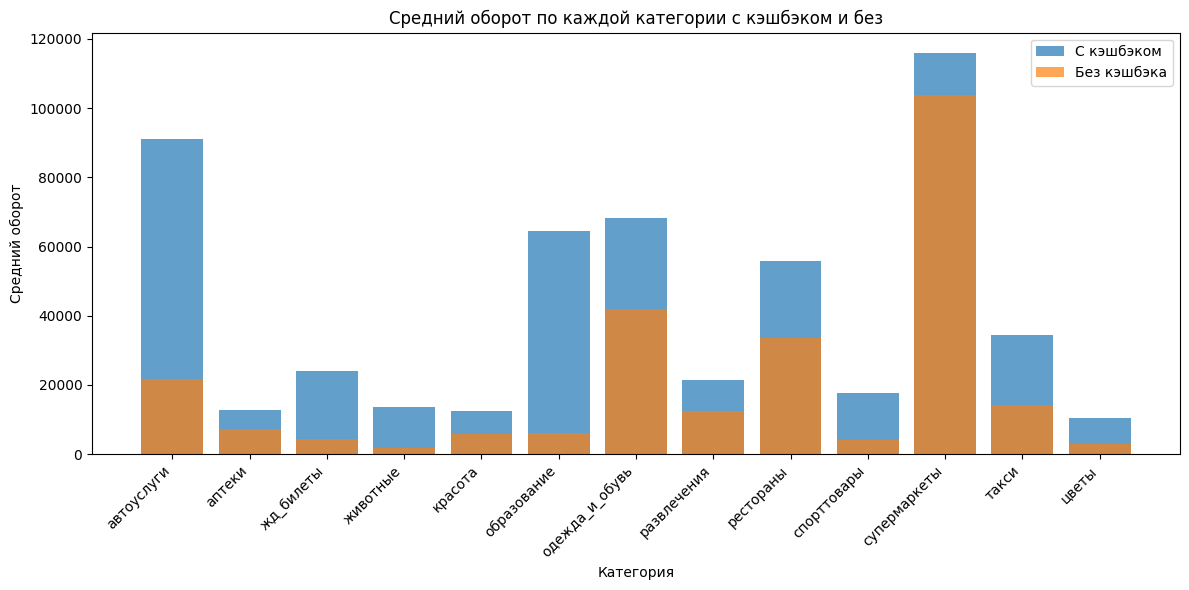

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(res1['Category'], res1['MeanWithCashback'], label='С кэшбэком', alpha=0.7)
plt.bar(res1['Category'], res1['MeanWithoutCashback'], label='Без кэшбэка', alpha=0.7)

plt.xlabel('Категория')
plt.ylabel('Средний оборот')
plt.title('Средний оборот по каждой категории с кэшбэком и без')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
result_df = result_df.sort_values(by='percent_to_be_choosen')
result_df

,Category,MeanWithCashback,MeanWithoutCashback,percent_to_be_choosen
15,каршеринг,63252.569412,1681.314389,22.474881
9,образование,63904.485693,6030.653977,23.611477
16,аренда_авто,3288.298883,396.763537,25.175809
13,цветы,10611.581769,2760.602416,27.238513
8,жд_билеты,23527.542040,4358.637117,33.143794
14,фастфуд,35730.407080,35778.242953,34.398782
11,спорттовары,18670.466691,4133.952740,41.182627
6,красота,12146.532841,5780.631958,55.467056
12,животные,14583.556394,1742.899545,56.548780
10,дом_и_ремонт,113193.553911,34849.248138,59.198999


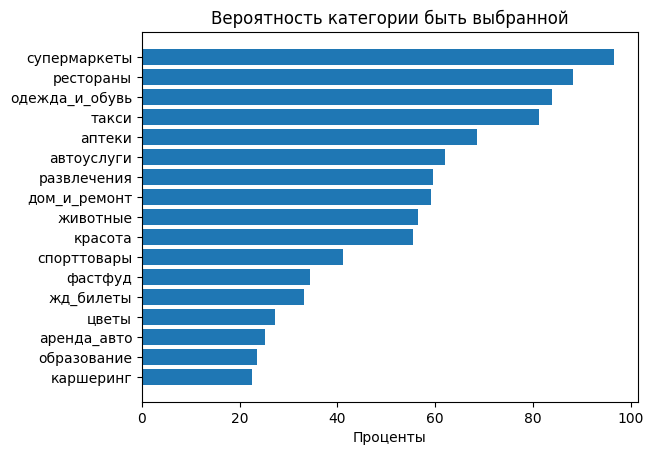

In [ ]:
plt.barh(result_df['Category'], result_df['percent_to_be_choosen'])
plt.xlabel('Проценты')
plt.title('Вероятность категории быть выбранной')
plt.show()

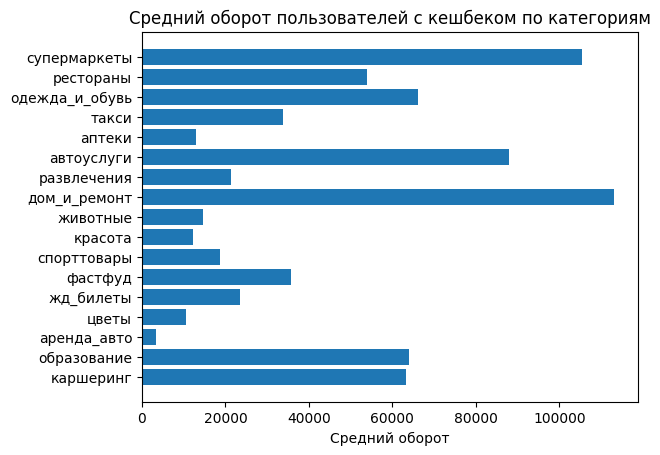

In [ ]:
plt.barh(result_df['Category'], result_df['MeanWithCashback'], label='MeanWithCashback')
plt.xlabel('Средний оборот')
plt.title('Средний оборот пользователей с кешбеком по категориям')
plt.show()

In [ ]:
categories

['аптеки',
 'рестораны',
 'одежда_и_обувь',
 'автоуслуги',
 'супермаркеты',
 'такси',
 'красота',
 'развлечения',
 'жд_билеты',
 'образование',
 'дом_и_ремонт',
 'спорттовары',
 'животные',
 'цветы',
 'фастфуд',
 'каршеринг',
 'аренда_авто']

In [ ]:
for i in categories:
  print('активация_'+i+', ')

активация_аптеки, 
активация_рестораны, 
активация_одежда_и_обувь, 
активация_автоуслуги, 
активация_супермаркеты, 
активация_такси, 
активация_красота, 
активация_развлечения, 
активация_жд_билеты, 
активация_образование, 
активация_дом_и_ремонт, 
активация_спорттовары, 
активация_животные, 
активация_цветы, 
активация_фастфуд, 
активация_каршеринг, 
активация_аренда_авто, 


In [ ]:
dict_useful_count = {i: 0 for i in categories}
dict_useful_count

{'аптеки': 0,
 'рестораны': 0,
 'одежда_и_обувь': 0,
 'автоуслуги': 0,
 'супермаркеты': 0,
 'такси': 0,
 'красота': 0,
 'развлечения': 0,
 'жд_билеты': 0,
 'образование': 0,
 'дом_и_ремонт': 0,
 'спорттовары': 0,
 'животные': 0,
 'цветы': 0,
 'фастфуд': 0,
 'каршеринг': 0,
 'аренда_авто': 0}

In [ ]:
import math

In [ ]:
for index, row in df.iterrows():
    selected = []
    cats = []
    for cat in categories:
        if row['активация_кэшбэка_' + cat] == 1:
            selected.append(cat)
        t = row['оборот_'+cat]
        if math.isnan(t):
            t = 0
        cats.append((t, cat))
    cats.sort()
    for s in selected:
        index = [i for i, p in enumerate(cats) if p[1] == s][0]
        list_length = len(cats)

        if index < list_length / 3:
            dict_useful_count[s] += 1
        else:
            pass

In [ ]:
dict_useful_count

{'аптеки': 3883,
 'рестораны': 98,
 'одежда_и_обувь': 710,
 'автоуслуги': 1834,
 'супермаркеты': 0,
 'такси': 20,
 'красота': 3012,
 'развлечения': 688,
 'жд_билеты': 3735,
 'образование': 429,
 'дом_и_ремонт': 497,
 'спорттовары': 431,
 'животные': 1215,
 'цветы': 147,
 'фастфуд': 0,
 'каршеринг': 40,
 'аренда_авто': 347}

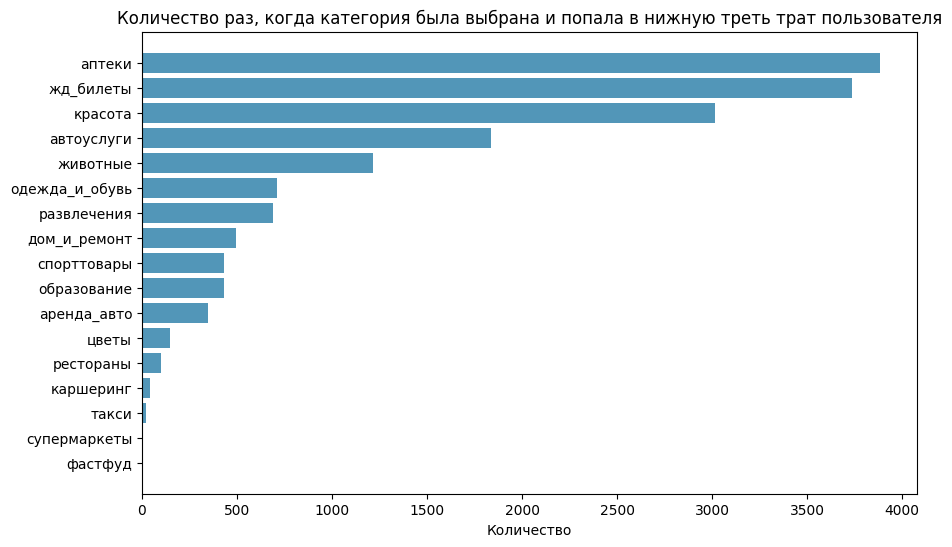

In [ ]:
ctg = list(dict_useful_count.keys())
v = list(dict_useful_count.values())

sorted_data = sorted(zip(ctg, v), key=lambda x: x[1], reverse=True)

sorted_ctg, sorted_v = zip(*sorted_data)

plt.figure(figsize=(10, 6))
plt.barh(sorted_ctg, sorted_v, color='#5296b8')
#plt.barh(sorted_ctg, sorted_v, color='#135669')
plt.xlabel('Количество')
plt.title('Количество раз, когда категория была выбрана и попала в нижную треть трат пользователя')
plt.gca().invert_yaxis()

plt.show()

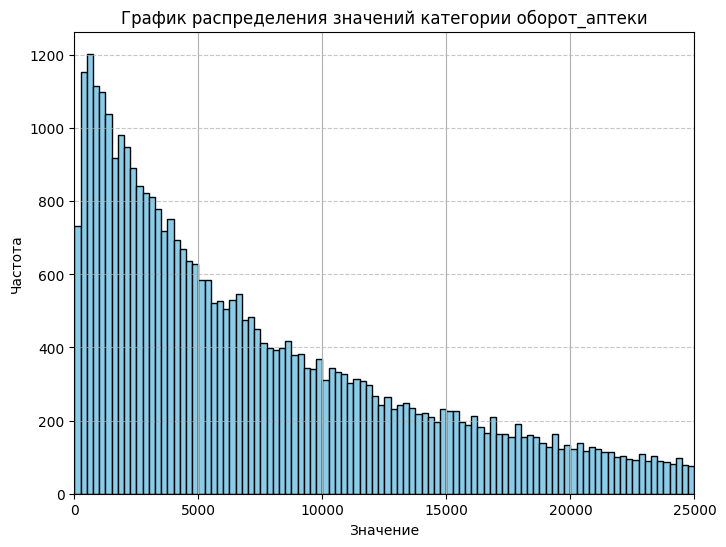

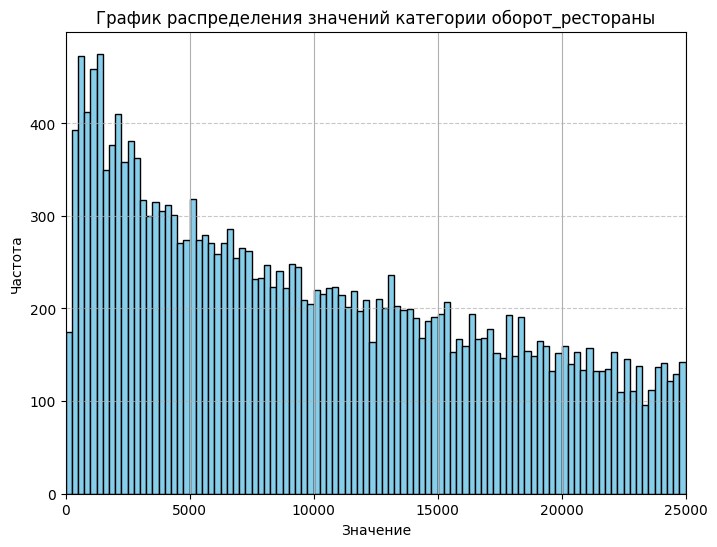

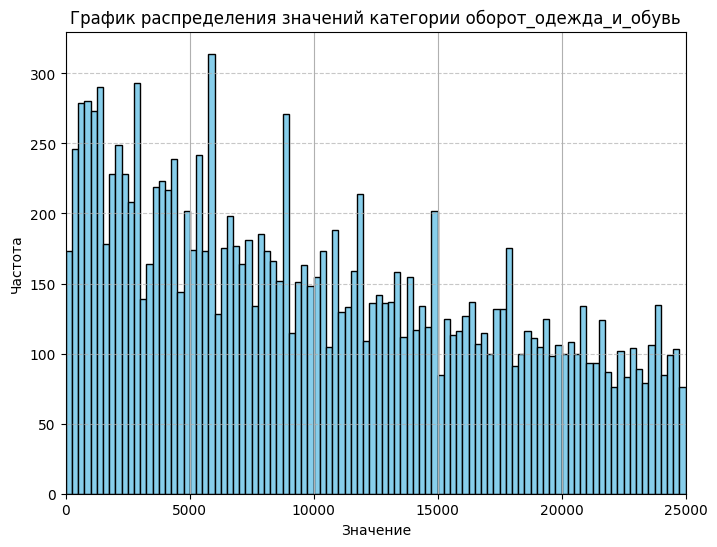

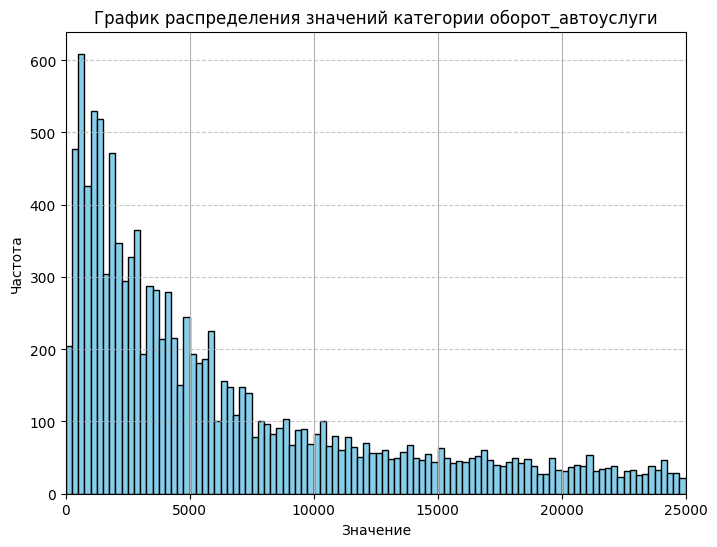

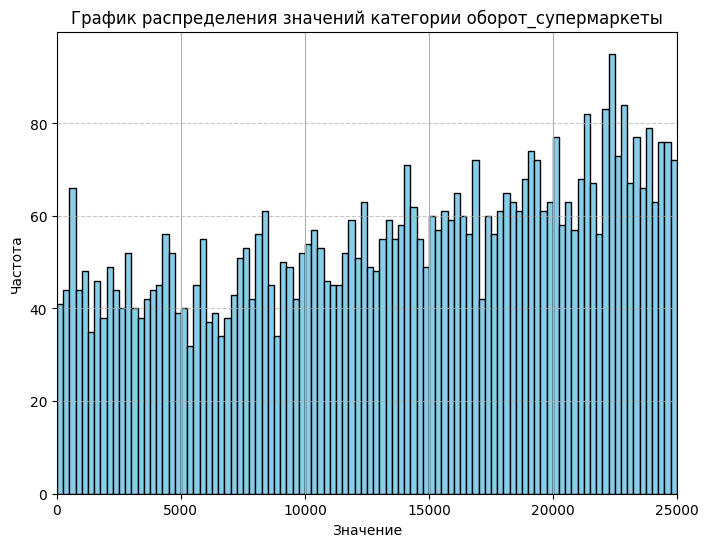

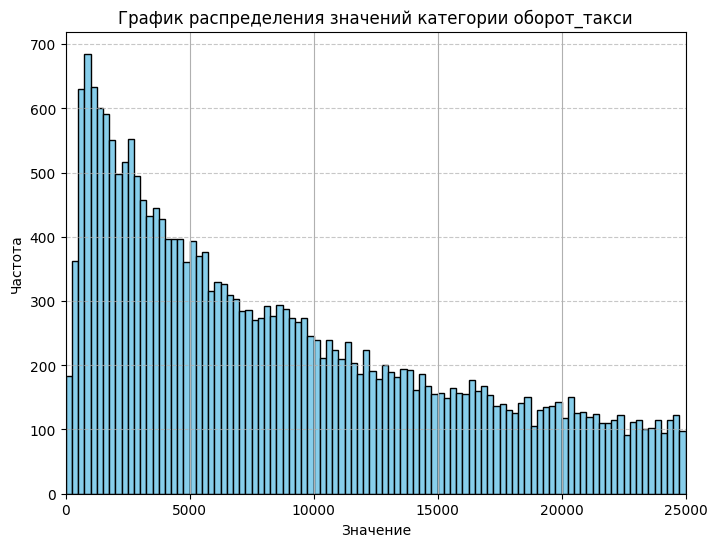

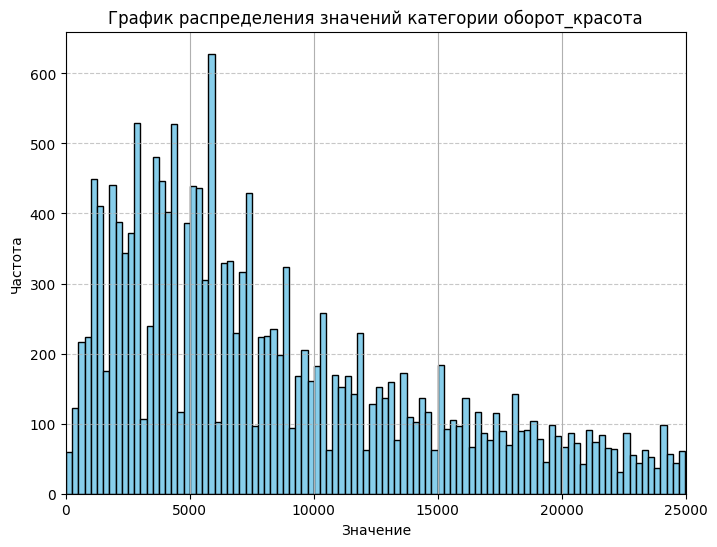

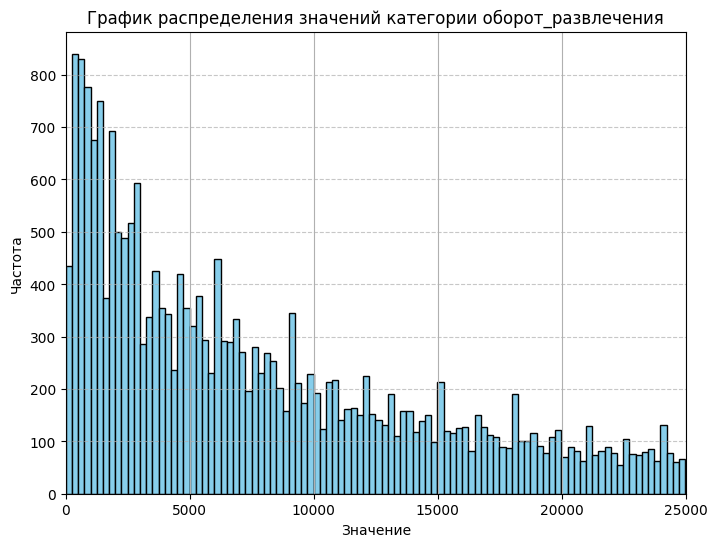

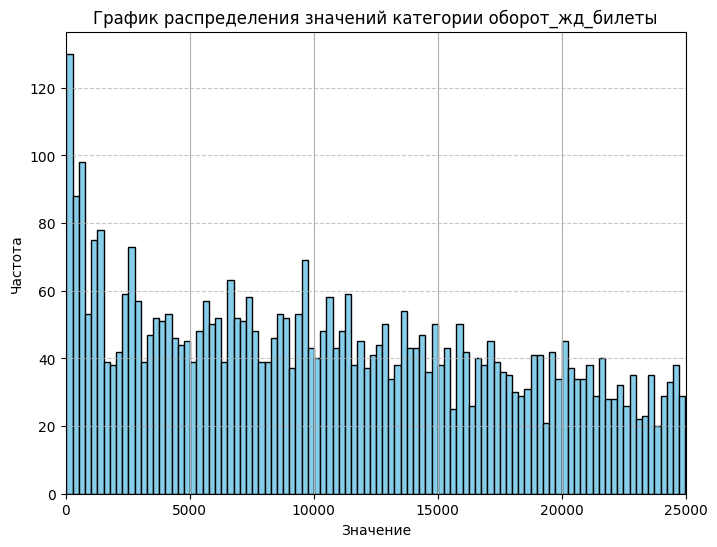

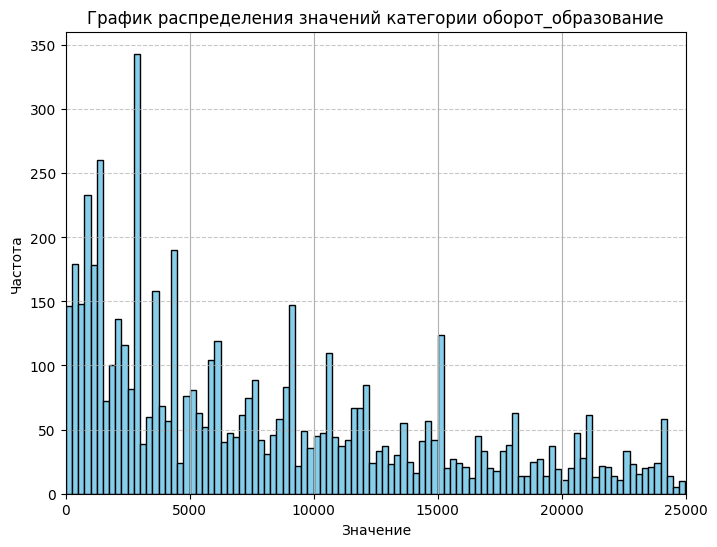

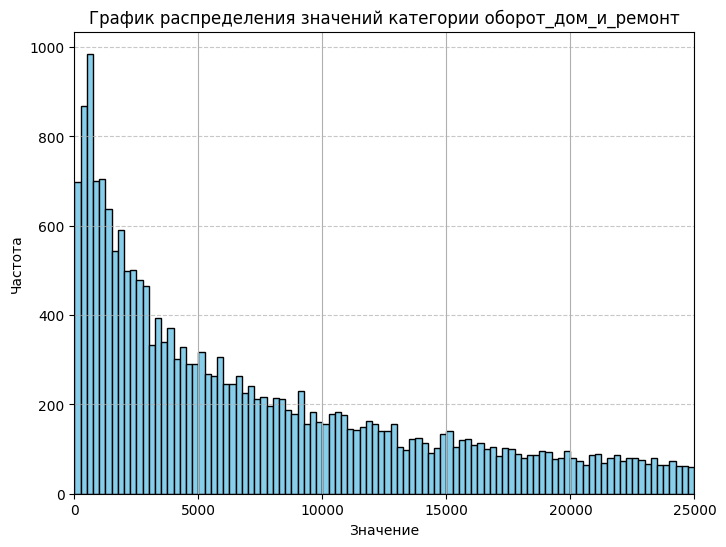

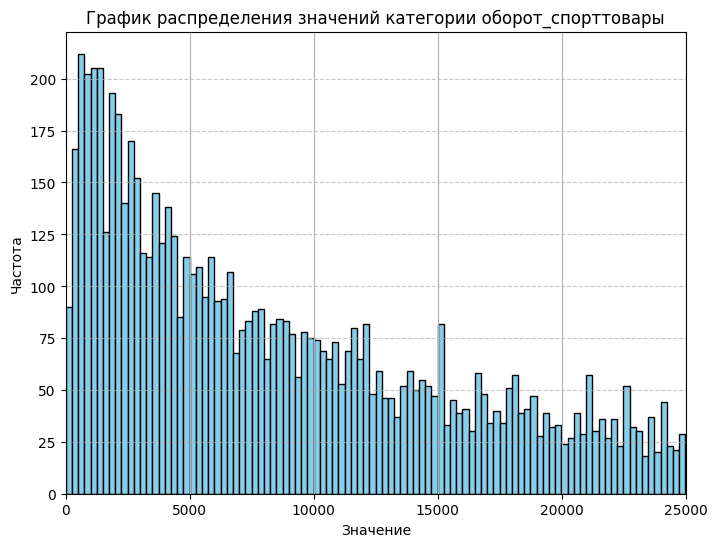

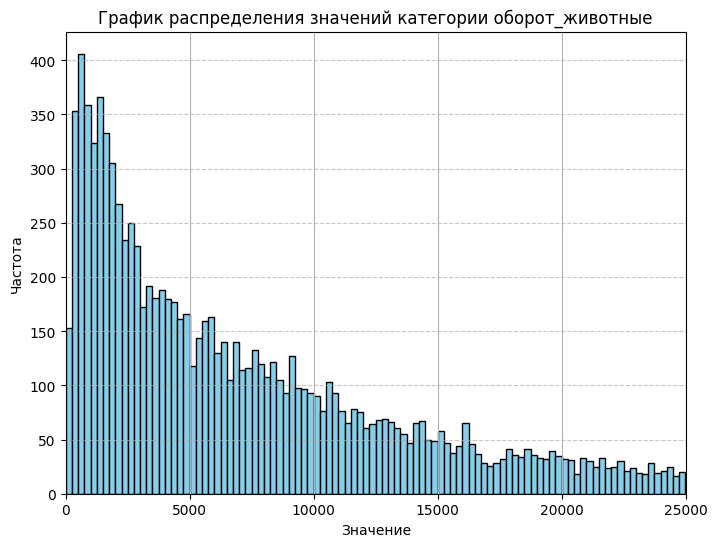

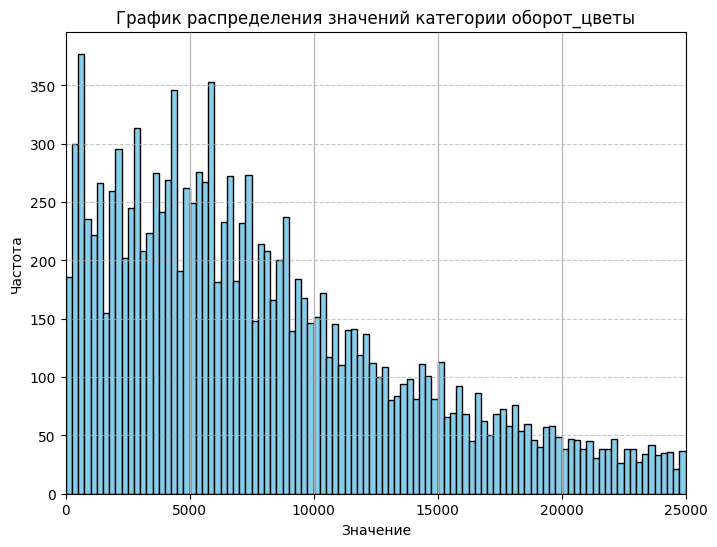

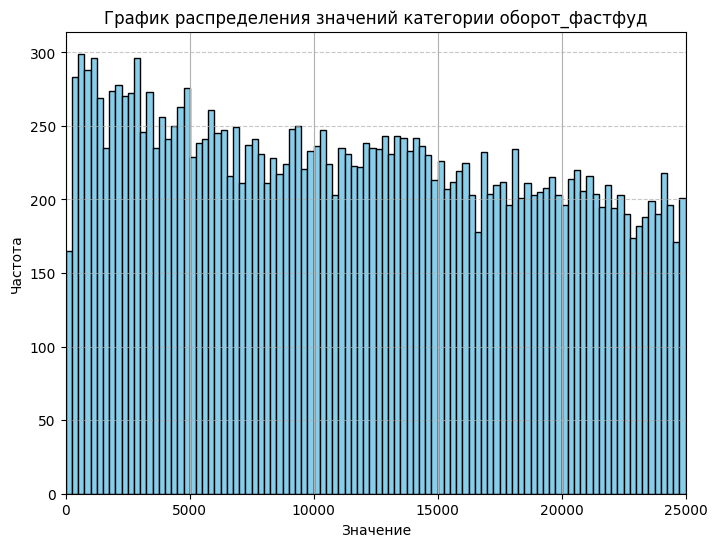

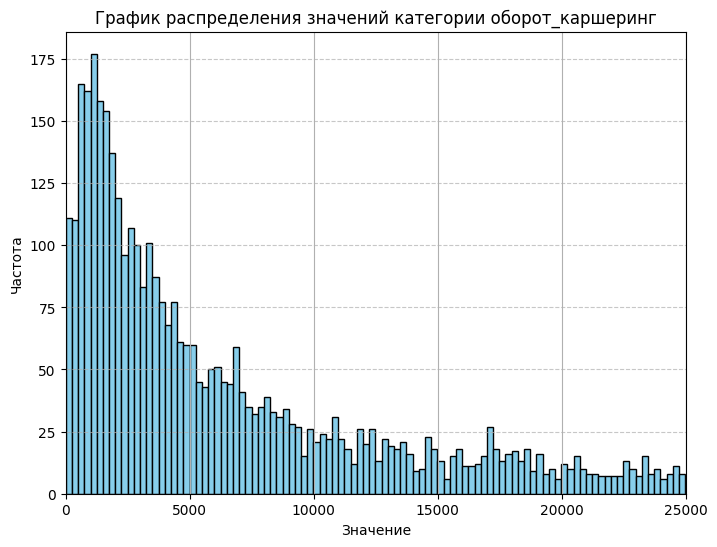

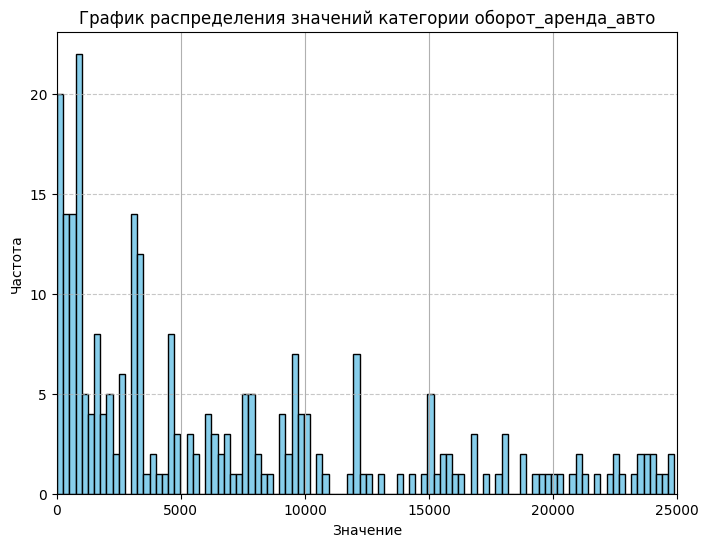

In [ ]:
for category in categories:
    category = 'оборот_' + category
    plt.figure(figsize=(8, 6))
    value_limit = 25000
    filtered_data = df.dropna(subset=[category])[(df[category] < value_limit) & (df['is_vybr'] == 0) & (df[category] != 0)]
    filtered_data[category].hist(bins=100, color='skyblue', edgecolor='black')
    plt.title('График распределения значений категории ' + category)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(0, value_limit)
    plt.show()

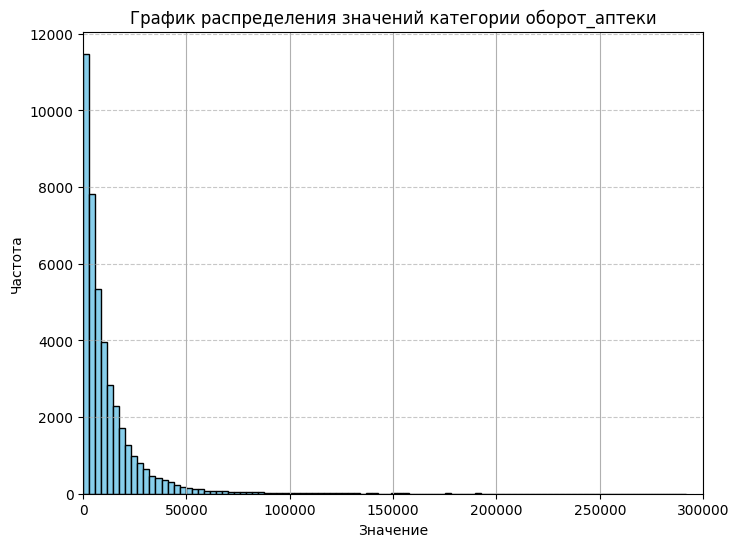

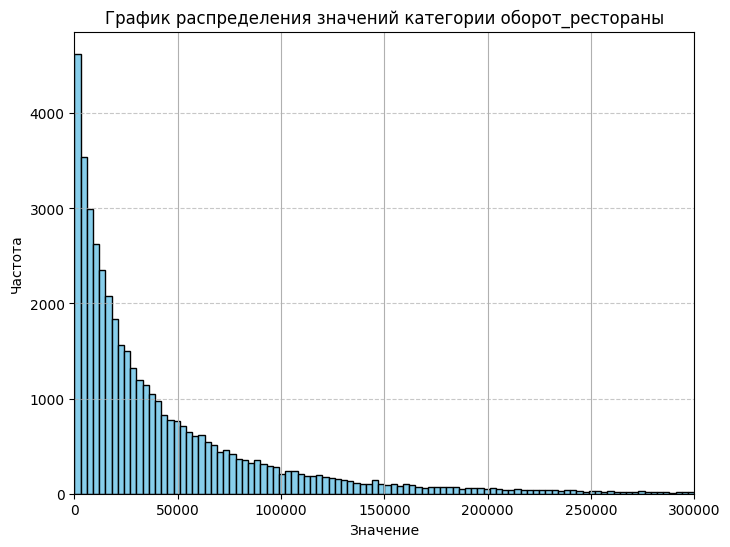

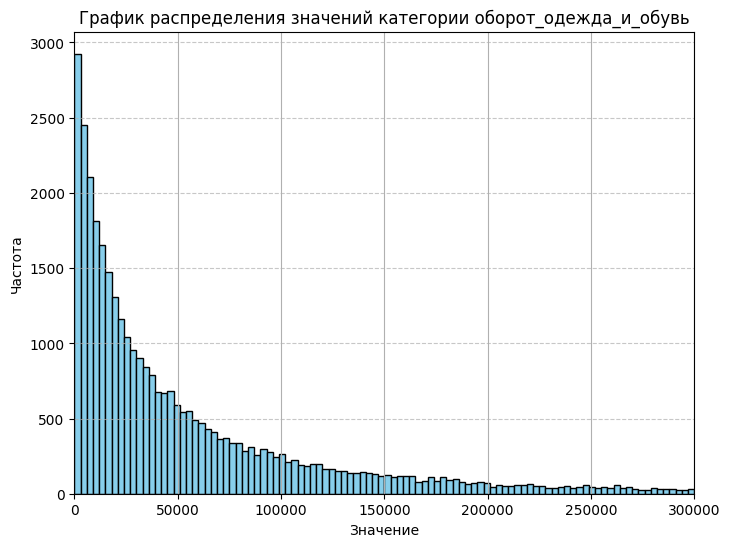

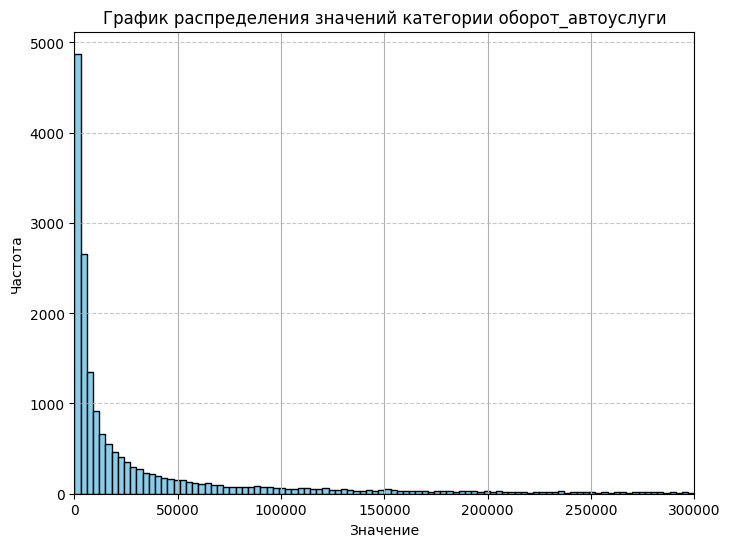

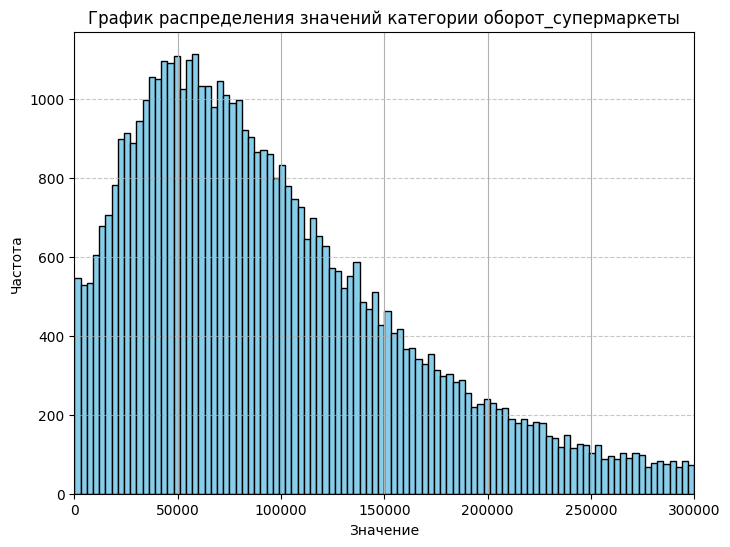

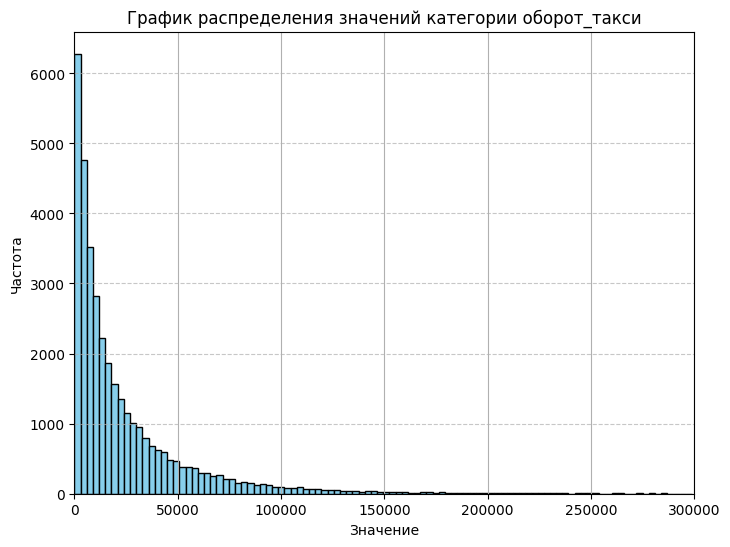

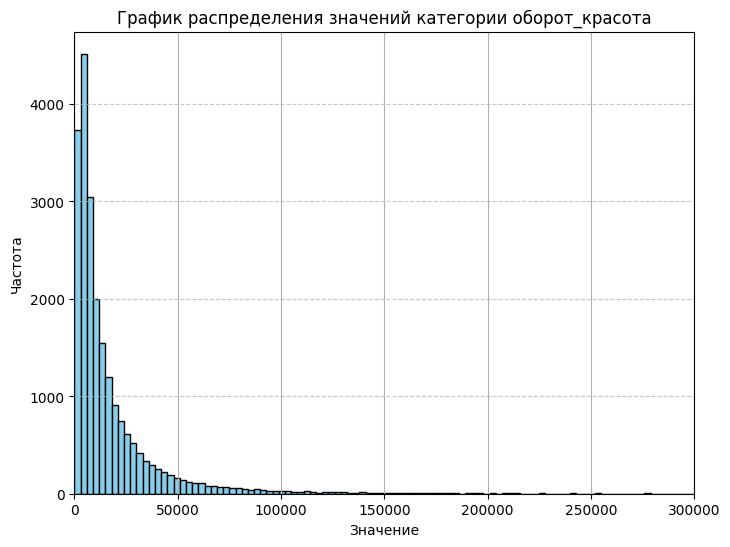

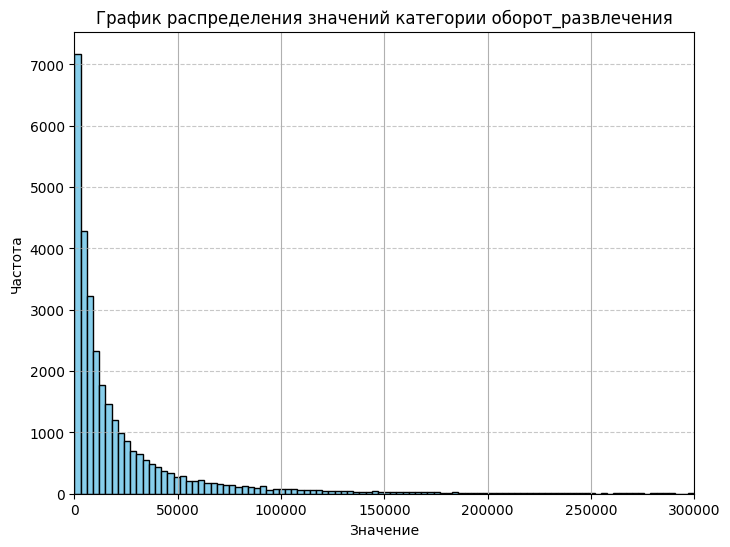

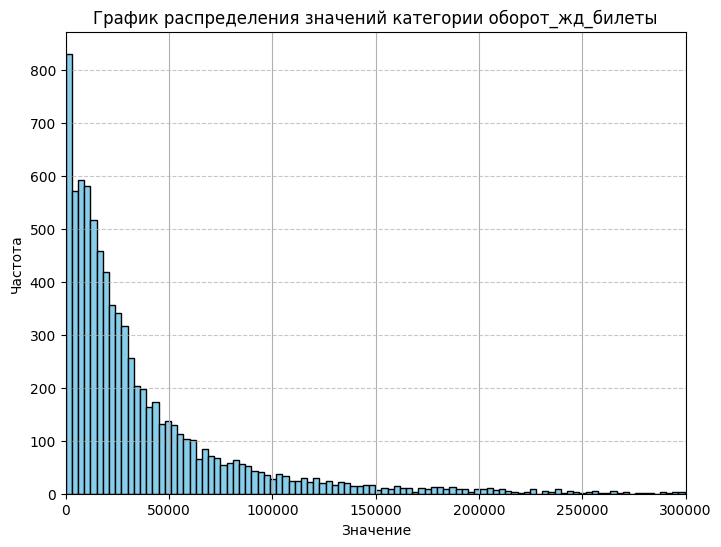

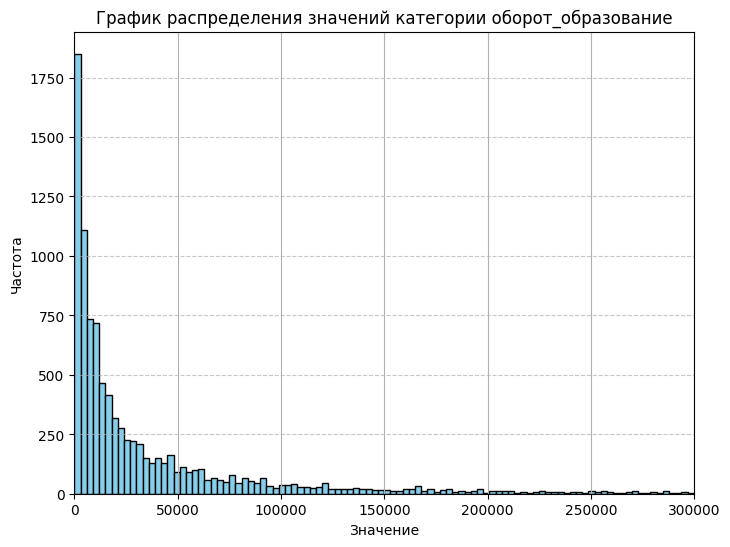

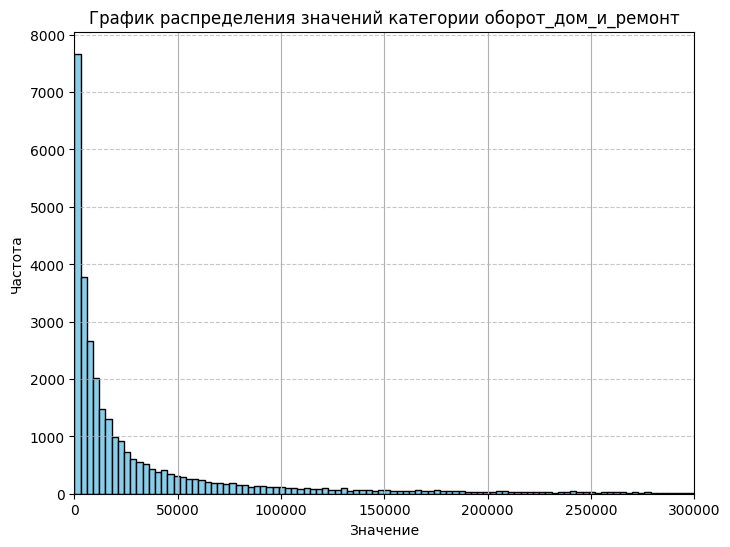

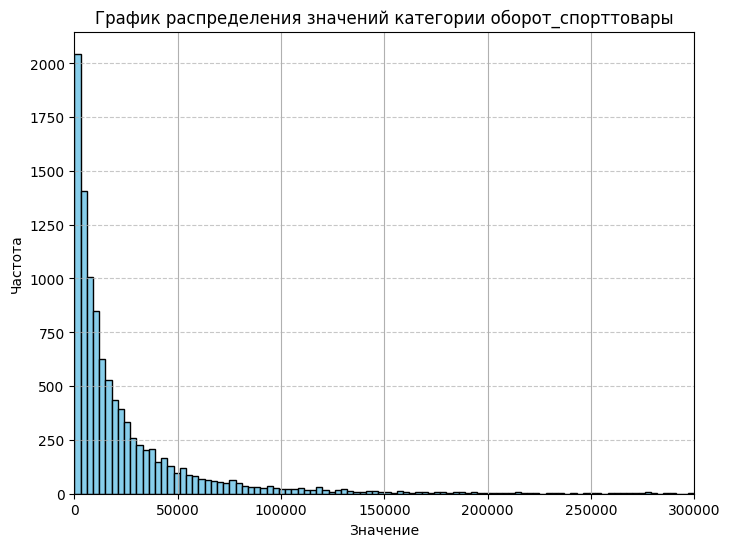

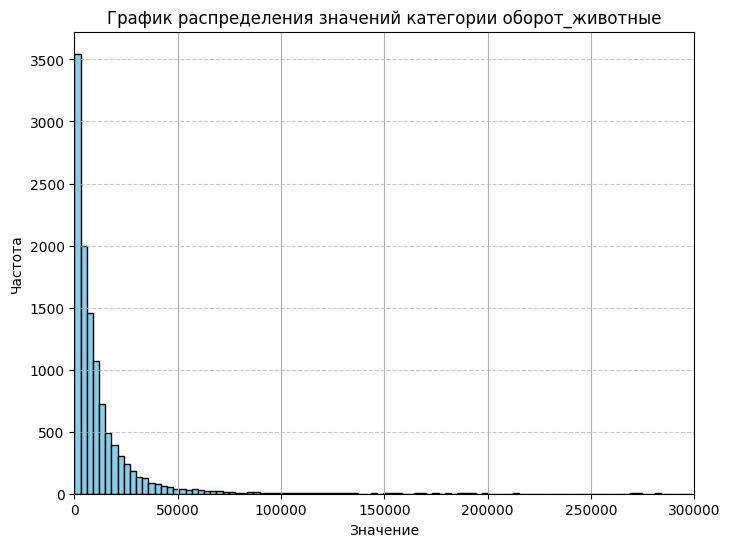

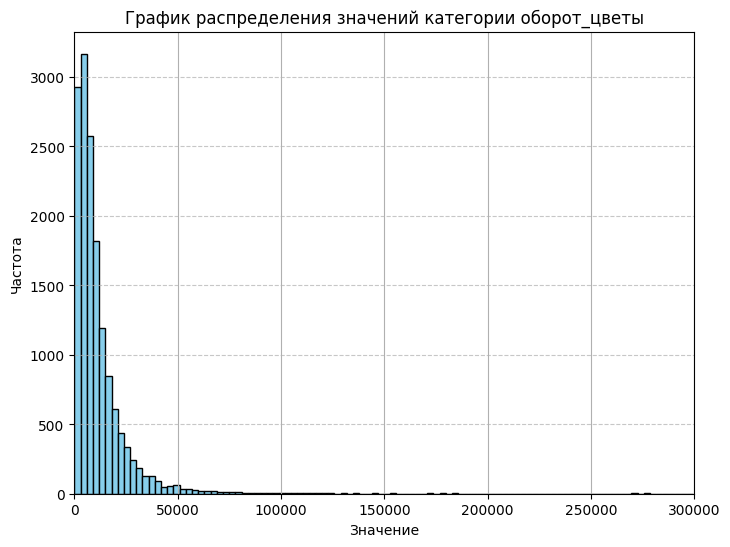

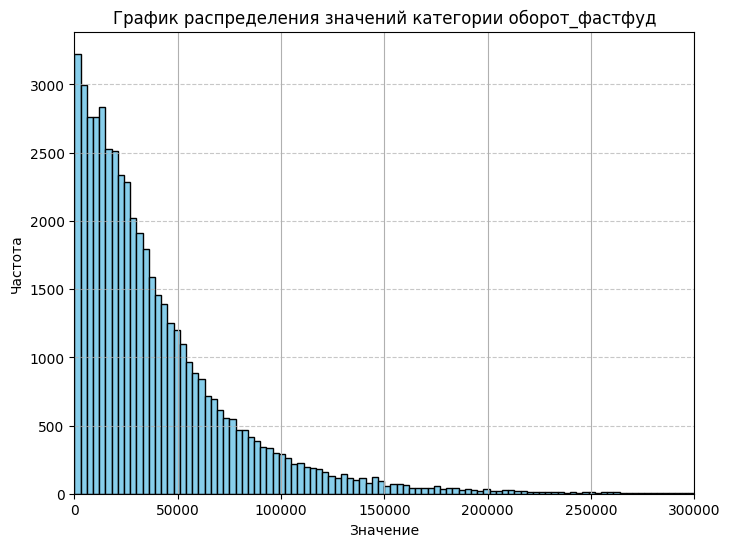

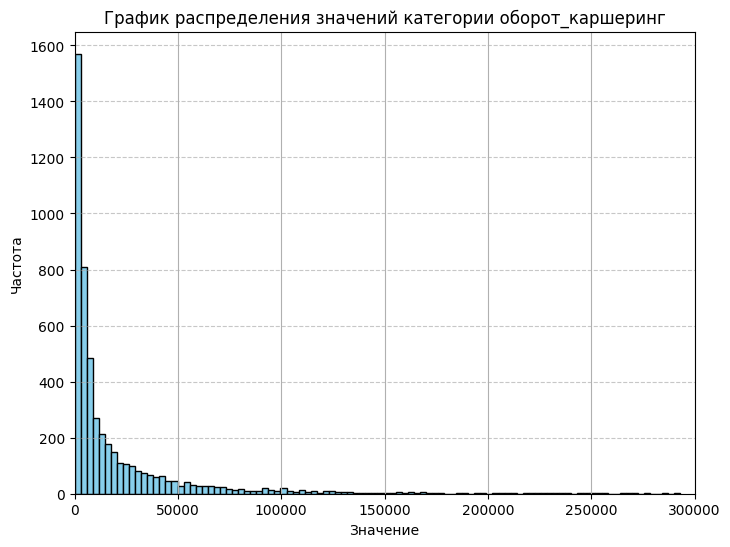

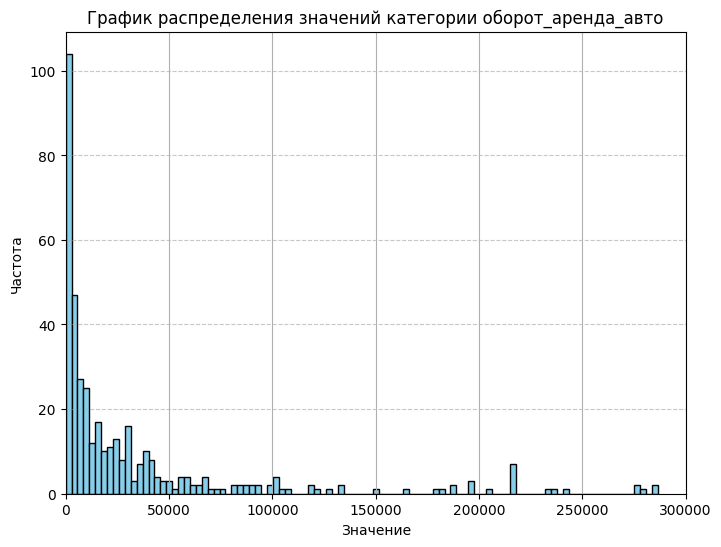

In [ ]:
for category in categories:
    category = 'оборот_' + category
    plt.figure(figsize=(8, 6))
    value_limit = 300000
    filtered_data = df.dropna(subset=[category])[(df[category] < value_limit) & (df['is_vybr'] == 0) & (df[category] != 0)]
    filtered_data[category].hist(bins=100, color='skyblue', edgecolor='black')
    plt.title('График распределения значений категории ' + category)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(0, value_limit)
    plt.show()

In [ ]:
selected_columns = ['возраст', 'оборот_аптеки',
       'оборот_рестораны', 'оборот_одежда_и_обувь', 'оборот_автоуслуги',
       'оборот_супермаркеты', 'оборот_такси', 'оборот_красота',
       'оборот_развлечения', 'оборот_жд_билеты', 'оборот_образование',
       'оборот_дом_и_ремонт', 'оборот_спорттовары', 'оборот_животные',
       'оборот_цветы', 'оборот_фастфуд', 'оборот_каршеринг',
       'оборот_аренда_авто', 'активация_кэшбэка_аптеки',
       'активация_кэшбэка_рестораны', 'активация_кэшбэка_одежда_и_обувь',
       'активация_кэшбэка_автоуслуги', 'активация_кэшбэка_супермаркеты',
       'активация_кэшбэка_такси', 'активация_кэшбэка_красота',
       'активация_кэшбэка_развлечения', 'активация_кэшбэка_жд_билеты',
       'активация_кэшбэка_образование', 'активация_кэшбэка_дом_и_ремонт',
       'активация_кэшбэка_спорттовары', 'активация_кэшбэка_животные',
       'активация_кэшбэка_цветы', 'активация_кэшбэка_фастфуд',
       'активация_кэшбэка_каршеринг', 'активация_кэшбэка_аренда_авто',
       'кэшбэк_аптеки', 'кэшбэк_рестораны', 'кэшбэк_одежда_и_обувь',
       'кэшбэк_автоуслуги', 'кэшбэк_супермаркеты', 'кэшбэк_такси',
       'кэшбэк_красота', 'кэшбэк_развлечения', 'кэшбэк_жд_билеты',
       'кэшбэк_образование', 'кэшбэк_дом_и_ремонт', 'кэшбэк_спорттовары',
       'кэшбэк_животные', 'кэшбэк_цветы', 'кэшбэк_фастфуд', 'кэшбэк_каршеринг',
       'кэшбэк_аренда_авто']

# subset_data = df[selected_columns]

# correlation_matrix = subset_data.corr()

In [ ]:
# from scipy.stats import pearsonr, spearmanr
# for cat in categories:
#     df['активация_кэшбэка_'+cat].fillna(0, inplace=True)
#     df['оборот_'+cat].fillna(0, inplace=True)
#
#     corr, p_value = pearsonr(df['активация_кэшбэка_'+cat], df['оборот_'+cat])
#     # corr, p_value = spearmanr(df['активация_кэшбэка_аптеки'], df['оборот_аптеки'])
#
#     print(f'Корреляция: {corr}')
#     print(f'P-value: {p_value}')

In [ ]:
z = ['Unnamed: 0',
 'id',
 'ключ_клиента',
 'регион_проживания',
 'город_проживания',
 'возраст',
 'пол',
 'месяц_покупок',
 'оборот_аптеки',
 'оборот_рестораны',
 'оборот_одежда_и_обувь',
 'оборот_автоуслуги',
 'оборот_супермаркеты',
 'оборот_такси',
 'оборот_красота',
 'оборот_развлечения',
 'оборот_жд_билеты',
 'оборот_образование',
 'оборот_дом_и_ремонт',
 'оборот_спорттовары',
 'оборот_животные',
 'оборот_цветы',
 'оборот_фастфуд',
 'оборот_каршеринг',
 'оборот_аренда_авто',
 'активация_кэшбэка_аптеки',
 'активация_кэшбэка_рестораны',
 'активация_кэшбэка_одежда_и_обувь',
 'активация_кэшбэка_автоуслуги',
 'активация_кэшбэка_супермаркеты',
 'активация_кэшбэка_такси',
 'активация_кэшбэка_красота',
 'активация_кэшбэка_развлечения',
 'активация_кэшбэка_жд_билеты',
 'активация_кэшбэка_образование',
 'активация_кэшбэка_дом_и_ремонт',
 'активация_кэшбэка_спорттовары',
 'активация_кэшбэка_животные',
 'активация_кэшбэка_цветы',
 'активация_кэшбэка_фастфуд',
 'активация_кэшбэка_каршеринг',
 'активация_кэшбэка_аренда_авто',
 'кэшбэк_аптеки',
 'кэшбэк_рестораны',
 'кэшбэк_одежда_и_обувь',
 'кэшбэк_автоуслуги',
 'кэшбэк_супермаркеты',
 'кэшбэк_такси',
 'кэшбэк_красота',
 'кэшбэк_развлечения',
 'кэшбэк_жд_билеты',
 'кэшбэк_образование',
 'кэшбэк_дом_и_ремонт',
 'кэшбэк_спорттовары',
 'кэшбэк_животные',
 'кэшбэк_цветы',
 'кэшбэк_фастфуд',
 'кэшбэк_каршеринг',
 'кэшбэк_аренда_авто',
 'is_vybr',
 'предыдущий_месяц',
 'p_Unnamed: 0',
 'p_id',
 'p_ключ_клиента',
 'p_регион_проживания',
 'p_город_проживания',
 'p_возраст',
 'p_пол',
 'p_месяц_покупок',
 'p_оборот_аптеки',
 'p_оборот_рестораны',
 'p_оборот_одежда_и_обувь',
 'p_оборот_автоуслуги',
 'p_оборот_супермаркеты',
 'p_оборот_такси',
 'p_оборот_красота',
 'p_оборот_развлечения',
 'p_оборот_жд_билеты',
 'p_оборот_образование',
 'p_оборот_дом_и_ремонт',
 'p_оборот_спорттовары',
 'p_оборот_животные',
 'p_оборот_цветы',
 'p_оборот_фастфуд',
 'p_оборот_каршеринг',
 'p_оборот_аренда_авто',
 'p_активация_кэшбэка_аптеки',
 'p_активация_кэшбэка_рестораны',
 'p_активация_кэшбэка_одежда_и_обувь',
 'p_активация_кэшбэка_автоуслуги',
 'p_активация_кэшбэка_супермаркеты',
 'p_активация_кэшбэка_такси',
 'p_активация_кэшбэка_красота',
 'p_активация_кэшбэка_развлечения',
 'p_активация_кэшбэка_жд_билеты',
 'p_активация_кэшбэка_образование',
 'p_активация_кэшбэка_дом_и_ремонт',
 'p_активация_кэшбэка_спорттовары',
 'p_активация_кэшбэка_животные',
 'p_активация_кэшбэка_цветы',
 'p_активация_кэшбэка_фастфуд',
 'p_активация_кэшбэка_каршеринг',
 'p_активация_кэшбэка_аренда_авто',
 'p_кэшбэк_аптеки',
 'p_кэшбэк_рестораны',
 'p_кэшбэк_одежда_и_обувь',
 'p_кэшбэк_автоуслуги',
 'p_кэшбэк_супермаркеты',
 'p_кэшбэк_такси',
 'p_кэшбэк_красота',
 'p_кэшбэк_развлечения',
 'p_кэшбэк_жд_билеты',
 'p_кэшбэк_образование',
 'p_кэшбэк_дом_и_ремонт',
 'p_кэшбэк_спорттовары',
 'p_кэшбэк_животные',
 'p_кэшбэк_цветы',
 'p_кэшбэк_фастфуд',
 'p_кэшбэк_каршеринг',
 'p_кэшбэк_аренда_авто',
 'p_is_vybr',
 'p_предыдущий_месяц']

In [ ]:
df['месяц_покупок'] = pd.to_datetime(df['месяц_покупок'])

df = df.sort_values(by=['ключ_клиента', 'месяц_покупок'])

df_with_p = pd.DataFrame()

for client in tqdm(df['ключ_клиента'].unique(), desc="Processing", unit="iteration"):
    client_data = df[df['ключ_клиента'] == client].copy()
    client_data['предыдущий_месяц'] = client_data['месяц_покупок'].shift(1)

    new_client = pd.DataFrame(columns=z)
    for ind, m in client_data.iterrows():
        p_m = m['предыдущий_месяц']
        for _ind, _m in client_data.iterrows():
            if _m['месяц_покупок'] == p_m:
                for i, v in _m.items(): # column, value
                    m['p_'+i] = v
                break
        else:
            continue
        new_client.loc[len(new_client)] = m
    df_with_p = pd.concat([df_with_p, new_client], ignore_index=True)

# df_with_p = df_with_p.dropna(subset=['предыдущий_месяц'])
df_with_p

Processing: 100%|██████████| 9971/9971 [35:28<00:00,  4.68iteration/s]


,Unnamed: 0,id,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,...,p_кэшбэк_образование,p_кэшбэк_дом_и_ремонт,p_кэшбэк_спорттовары,p_кэшбэк_животные,p_кэшбэк_цветы,p_кэшбэк_фастфуд,p_кэшбэк_каршеринг,p_кэшбэк_аренда_авто,p_is_vybr,p_предыдущий_месяц
0,1,1,1889,Москва,Москва,50,M,2023-05-01,37807.0,92424.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaT
1,2,2,1889,Москва,Москва,50,M,2023-06-01,20791.0,124800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-04-01
2,3,3,1889,Москва,Москва,50,M,2023-07-01,131129.0,18060.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-05-01
3,4,4,1889,Москва,Москва,50,M,2023-08-01,44096.0,198480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-06-01
4,5,5,1889,Москва,Москва,50,M,2023-09-01,62766.0,165720.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49850,59821,59821,1005319581,Москва,Москва,37,NaN,2023-05-01,657.0,54375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaT
49851,59822,59822,1005319581,Москва,Москва,37,NaN,2023-06-01,0.0,128070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2023-04-01
49852,59823,59823,1005319581,Москва,Москва,37,NaN,2023-07-01,5919.0,26085.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2023-05-01
49853,59824,59824,1005319581,Москва,Москва,37,NaN,2023-08-01,1705.0,111690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2023-06-01


In [ ]:
df_with_p.to_excel('df_with_p.xlsx', index=False)

In [ ]:
df_with_p = pd.read_excel('df_with_p.xlsx')

In [ ]:
X = pd.DataFrame(dtype='float64', columns=['num_of_cuts', # сумма активаций
 'можно_выбрать_аптеки', # активация 1 или 0
 'можно_выбрать_рестораны',
 'можно_выбрать_одежда_и_обувь',
 'можно_выбрать_автоуслуги',
 'можно_выбрать_супермаркеты',
 'можно_выбрать_такси',
 'можно_выбрать_красота',
 'можно_выбрать_развлечения',
 'можно_выбрать_жд_билеты',
 'можно_выбрать_образование',
 'можно_выбрать_дом_и_ремонт',
 'можно_выбрать_спорттовары',
 'можно_выбрать_животные',
 'можно_выбрать_цветы',
 'можно_выбрать_фастфуд',
 'можно_выбрать_каршеринг',
 'можно_выбрать_аренда_авто',

 'оборот_аптеки', # оборот в прошлом месяце
 'оборот_рестораны',
 'оборот_одежда_и_обувь',
 'оборот_автоуслуги',
 'оборот_супермаркеты',
 'оборот_такси',
 'оборот_красота',
 'оборот_развлечения',
 'оборот_жд_билеты',
 'оборот_образование',
 'оборот_дом_и_ремонт',
 'оборот_спорттовары',
 'оборот_животные',
 'оборот_цветы',
 'оборот_фастфуд',
 'оборот_каршеринг',
 'оборот_аренда_авто'])

y = pd.DataFrame(dtype='bool', columns=[
 'активация_кэшбэка_аптеки', # активация 1 или 0
 'активация_кэшбэка_рестораны',
 'активация_кэшбэка_одежда_и_обувь',
 'активация_кэшбэка_автоуслуги',
 'активация_кэшбэка_супермаркеты',
 'активация_кэшбэка_такси',
 'активация_кэшбэка_красота',
 'активация_кэшбэка_развлечения',
 'активация_кэшбэка_жд_билеты',
 'активация_кэшбэка_образование',
 'активация_кэшбэка_дом_и_ремонт',
 'активация_кэшбэка_спорттовары',
 'активация_кэшбэка_животные',
 'активация_кэшбэка_цветы',
 'активация_кэшбэка_фастфуд',
 'активация_кэшбэка_каршеринг',
 'активация_кэшбэка_аренда_авто'])

In [ ]:
for ind, v in tqdm(df_with_p.iterrows(), desc="Processing", unit="iteration"):
    if v['is_vybr'] == 1:
        continue

    mX = pd.Series(dtype='float64', index=['num_of_cuts',
 'можно_выбрать_аптеки',
 'можно_выбрать_рестораны',
 'можно_выбрать_одежда_и_обувь',
 'можно_выбрать_автоуслуги',
 'можно_выбрать_супермаркеты',
 'можно_выбрать_такси',
 'можно_выбрать_красота',
 'можно_выбрать_развлечения',
 'можно_выбрать_жд_билеты',
 'можно_выбрать_образование',
 'можно_выбрать_дом_и_ремонт',
 'можно_выбрать_спорттовары',
 'можно_выбрать_животные',
 'можно_выбрать_цветы',
 'можно_выбрать_фастфуд',
 'можно_выбрать_каршеринг',
 'можно_выбрать_аренда_авто',

 'оборот_аптеки',
 'оборот_рестораны',
 'оборот_одежда_и_обувь',
 'оборот_автоуслуги',
 'оборот_супермаркеты',
 'оборот_такси',
 'оборот_красота',
 'оборот_развлечения',
 'оборот_жд_билеты',
 'оборот_образование',
 'оборот_дом_и_ремонт',
 'оборот_спорттовары',
 'оборот_животные',
 'оборот_цветы',
 'оборот_фастфуд',
 'оборот_каршеринг',
 'оборот_аренда_авто'])
    mY = pd.Series(dtype='bool', index=[
 'активация_кэшбэка_аптеки',
 'активация_кэшбэка_рестораны',
 'активация_кэшбэка_одежда_и_обувь',
 'активация_кэшбэка_автоуслуги',
 'активация_кэшбэка_супермаркеты',
 'активация_кэшбэка_такси',
 'активация_кэшбэка_красота',
 'активация_кэшбэка_развлечения',
 'активация_кэшбэка_жд_билеты',
 'активация_кэшбэка_образование',
 'активация_кэшбэка_дом_и_ремонт',
 'активация_кэшбэка_спорттовары',
 'активация_кэшбэка_животные',
 'активация_кэшбэка_цветы',
 'активация_кэшбэка_фастфуд',
 'активация_кэшбэка_каршеринг',
 'активация_кэшбэка_аренда_авто'])
    for cat in categories:
        mX['можно_выбрать_'+cat] = int(v['активация_кэшбэка_'+cat] == 0 or v['активация_кэшбэка_'+cat] == 1)
        mX['оборот_'+cat] = 0 if math.isnan(v['p_оборот_'+cat]) else v['p_оборот_'+cat]
        mY['активация_кэшбэка_'+cat] = 1 if v['активация_кэшбэка_'+cat] == 1 else 0

    mX['num_of_cuts'] = sum(mX[i] for i in ['можно_выбрать_аптеки',
 'можно_выбрать_рестораны',
 'можно_выбрать_одежда_и_обувь',
 'можно_выбрать_автоуслуги',
 'можно_выбрать_супермаркеты',
 'можно_выбрать_такси',
 'можно_выбрать_красота',
 'можно_выбрать_развлечения',
 'можно_выбрать_жд_билеты',
 'можно_выбрать_образование',
 'можно_выбрать_дом_и_ремонт',
 'можно_выбрать_спорттовары',
 'можно_выбрать_животные',
 'можно_выбрать_цветы',
 'можно_выбрать_фастфуд',
 'можно_выбрать_каршеринг',
 'можно_выбрать_аренда_авто'])

    X.loc[len(X)] = mX
    y.loc[len(y)] = mY

Processing: 49855iteration [05:02, 164.78iteration/s]


In [ ]:
X.to_excel('X.xlsx', index=False)
y.to_excel('y.xlsx', index=False)

**MODEL TRAIN**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
X = pd.read_excel('X.xlsx')
y = pd.read_excel('y.xlsx')

In [ ]:
scaler = StandardScaler()

standardized_X = scaler.fit_transform(X)
normal_X = pd.DataFrame(standardized_X, columns=X.columns)
normal_X

,num_of_cuts,можно_выбрать_аптеки,можно_выбрать_рестораны,можно_выбрать_одежда_и_обувь,можно_выбрать_автоуслуги,можно_выбрать_супермаркеты,можно_выбрать_такси,можно_выбрать_красота,можно_выбрать_развлечения,можно_выбрать_жд_билеты,...,оборот_развлечения,оборот_жд_билеты,оборот_образование,оборот_дом_и_ремонт,оборот_спорттовары,оборот_животные,оборот_цветы,оборот_фастфуд,оборот_каршеринг,оборот_аренда_авто
0,2.316924,0.643993,-0.622195,-0.693507,1.912937,2.415255,-0.378623,1.226884,1.110760,-0.716889,...,0.266351,-0.182857,-0.162256,-0.192890,-0.121211,-0.171849,-0.164184,-0.207840,-0.124464,-0.038684
1,1.177509,0.643993,1.607213,-0.693507,-0.522756,2.415255,-0.378623,-0.815073,1.110760,-0.716889,...,1.291929,-0.182857,-0.162256,0.179196,0.001156,2.218568,-0.202796,1.209149,-0.124464,-0.038684
2,1.177509,0.643993,1.607213,-0.693507,1.912937,2.415255,-0.378623,-0.815073,-0.900285,-0.716889,...,2.040458,-0.182857,-0.162256,-0.143339,-0.046195,0.350803,-0.202796,-0.689380,-0.124464,-0.038684
3,0.038095,0.643993,1.607213,-0.693507,-0.522756,2.415255,-0.378623,1.226884,-0.900285,-0.716889,...,-0.301413,-0.182857,-0.162256,1.377465,-0.195696,1.005567,-0.202796,-0.526449,-0.124464,-0.038684
4,1.177509,0.643993,-0.622195,-0.693507,-0.522756,2.415255,-0.378623,1.226884,-0.900285,-0.716889,...,-0.301413,-0.182857,-0.162256,0.144908,0.272493,-0.171849,-0.202796,1.233332,-0.124464,-0.038684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46565,-4.519563,-1.552811,-0.622195,-0.693507,-0.522756,-0.414035,-0.378623,-0.815073,-0.900285,-0.716889,...,-0.301413,-0.182857,-0.162256,-0.248563,-0.195696,-0.171849,-0.202796,-0.753296,-0.124464,-0.038684
46566,0.038095,0.643993,1.607213,-0.693507,-0.522756,-0.414035,-0.378623,-0.815073,1.110760,-0.716889,...,0.335303,-0.182857,-0.162256,-0.238362,-0.046727,-0.171849,0.080473,0.817920,-0.124464,-0.038684
46567,0.038095,0.643993,-0.622195,-0.693507,-0.522756,-0.414035,-0.378623,-0.815073,1.110760,1.394916,...,0.495320,1.141615,-0.162256,0.019018,3.779654,-0.171849,-0.202796,-0.293918,-0.124464,-0.038684
46568,-1.101320,0.643993,-0.622195,-0.693507,-0.522756,-0.414035,-0.378623,1.226884,1.110760,-0.716889,...,-0.208235,-0.182857,-0.162256,-0.254732,-0.195696,-0.171849,-0.202796,-0.234781,-0.124464,-0.038684


In [ ]:
categories = []
for i in normal_X.columns:
  if i.startswith('оборот_'):
    categories.append(i[7:])
categories

['аптеки',
 'рестораны',
 'одежда_и_обувь',
 'автоуслуги',
 'супермаркеты',
 'такси',
 'красота',
 'развлечения',
 'жд_билеты',
 'образование',
 'дом_и_ремонт',
 'спорттовары',
 'животные',
 'цветы',
 'фастфуд',
 'каршеринг',
 'аренда_авто']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
def check_model(X_test, y_test, y_pred, k=17):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    print(f'Mean Squared Error: {mse} (sqrt {np.sqrt(mse)})')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2_score: {r2}')
    print("Adjusted R-squared:", adjusted_r2)



    for i in range(len(X_test)):
        n = int(X_test.iloc[i]['num_of_cuts'])
        data = y_pred[i]

        top_n_indices = np.argsort(data)[len(data)-n:]
        result = np.zeros_like(data)
        result[top_n_indices] = 1

        y_pred[i] = result

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    print(f'Mean Squared Error: {mse} (sqrt {np.sqrt(mse)})')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2_score: {r2}')
    print("Adjusted R-squared:", adjusted_r2)

# **17 MODELS**

In [ ]:
models = {}
drops = {'аптеки': [],
'рестораны': [],
'одежда_и_обувь': [],
'автоуслуги': [],
'супермаркеты': [],
'такси': [],
'красота': [],
'развлечения': [],
'жд_билеты': [],
'образование': [],
'дом_и_ремонт': [],
'спорттовары': [],
'животные': [],
'цветы': [],
'фастфуд': [],
'каршеринг': [],
'аренда_авто': []}

In [ ]:
for cat in categories:
    X_test_with_const = sm.add_constant(X_test.drop(columns=drops[cat]))
    model_sm = sm.OLS(y_test[['активация_кэшбэка_'+cat]], X_test_with_const).fit()

    # Выводим статистическую сводку
    # print(model_sm.summary())

    alpha = 0.05
    p_values = model_sm.pvalues
    non_significant_features = p_values[p_values > alpha].index

    drops[cat] = non_significant_features

In [ ]:
for cat in categories:
    model = LinearRegression()
    model.fit(X_train.drop(columns=drops[cat]).copy(), y_train[['активация_кэшбэка_'+cat]])

    models[cat] = model

    X_test_with_const = sm.add_constant(X_test.drop(columns=drops[cat]))
    model_sm = sm.OLS(y_test[['активация_кэшбэка_'+cat]], X_test_with_const).fit()

    print(model_sm.summary())


In [ ]:
summa_y = []
for i, model in models.items():
    summa_y.append(model.predict(X_test.drop(columns=drops[i])))

summa_y = np.array(summa_y).T[0]

In [ ]:
check_model(X_test, y_test, summa_y, k=17)

Mean Squared Error: 0.04561440657862431 (sqrt 0.21357529486957125)
Mean Absolute Error: 0.10280065547240282
R2_score: 0.492382233574484
Adjusted R-squared: 0.49145393086049594
Mean Squared Error: 0.12646995667496116 (sqrt 0.355626147344316)
Mean Absolute Error: 0.12646995667496116
R2_score: -0.11639210168218428
Adjusted R-squared: -0.11843369653250657


# **ONE MODEL**

In [ ]:
non_significant = {'аптеки': [],
'рестораны': [],
'одежда_и_обувь': [],
'автоуслуги': [],
'супермаркеты': [],
'такси': [],
'красота': [],
'развлечения': [],
'жд_билеты': [],
'образование': [],
'дом_и_ремонт': [],
'спорттовары': [],
'животные': [],
'цветы': [],
'фастфуд': [],
'каршеринг': [],
'аренда_авто': []}
p = pd.DataFrame(columns=categories)

In [ ]:
X_train.shape, y_train.shape

((37256, 35), (37256, 17))

In [ ]:
for cat in categories:
    X_train_with_const = sm.add_constant(X_train)

    model_sm = sm.OLS(y_train[['активация_кэшбэка_'+cat]], X_train_with_const).fit()

    alpha = 0.05
    p_values = model_sm.pvalues
    non_significant_features = p_values[p_values > alpha].index

    non_significant[cat] = non_significant_features
    p[cat] = model_sm.pvalues

    print(cat+':', list(non_significant_features))
    print(model_sm.df_resid)

аптеки: ['можно_выбрать_образование', 'можно_выбрать_фастфуд', 'оборот_рестораны', 'оборот_одежда_и_обувь', 'оборот_красота', 'оборот_развлечения', 'оборот_жд_билеты', 'оборот_дом_и_ремонт', 'оборот_спорттовары', 'оборот_цветы', 'оборот_аренда_авто']
37221.0
рестораны: ['оборот_одежда_и_обувь', 'оборот_автоуслуги', 'оборот_такси', 'оборот_красота', 'оборот_развлечения', 'оборот_жд_билеты', 'оборот_образование', 'оборот_спорттовары', 'оборот_животные', 'оборот_цветы', 'оборот_каршеринг', 'оборот_аренда_авто']
37221.0
одежда_и_обувь: ['оборот_аптеки', 'оборот_рестораны', 'оборот_супермаркеты', 'оборот_такси', 'оборот_развлечения', 'оборот_жд_билеты', 'оборот_образование', 'оборот_дом_и_ремонт', 'оборот_спорттовары', 'оборот_животные', 'оборот_цветы', 'оборот_фастфуд', 'оборот_аренда_авто']
37221.0
автоуслуги: ['оборот_рестораны', 'оборот_одежда_и_обувь', 'оборот_образование', 'оборот_спорттовары', 'оборот_животные', 'оборот_цветы', 'оборот_каршеринг', 'оборот_аренда_авто']
37221.0
суперм

In [ ]:
p = p.drop('const')

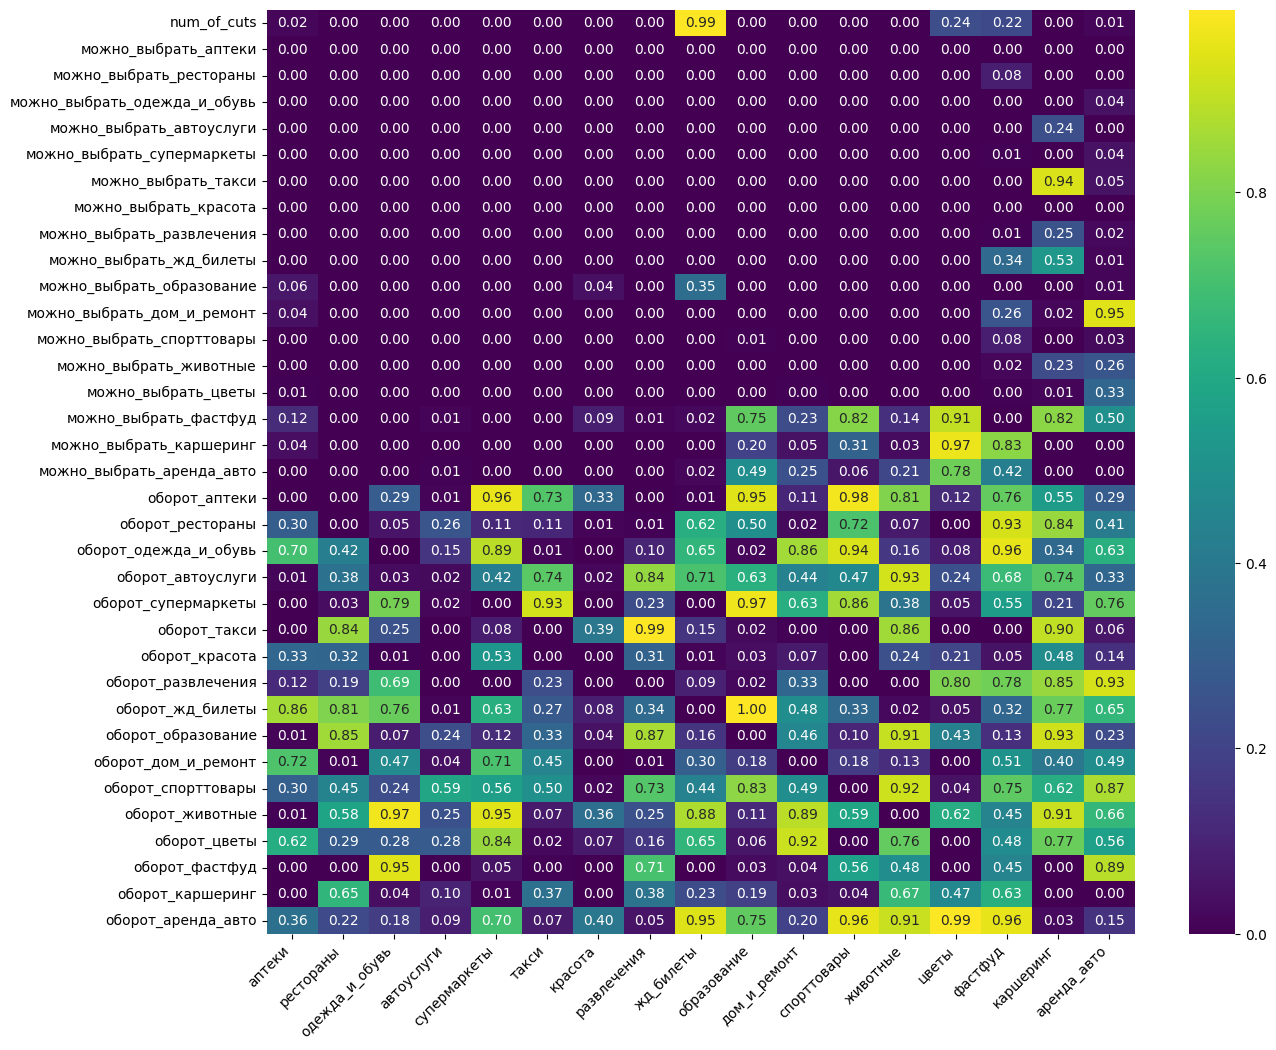

In [ ]:
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(p, cmap='viridis', annot=True, fmt=".2f", cbar=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

# pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x) if round(x, 6) != 0 else '0')
# pd.set_option('display.float_format', None)

In [ ]:
drop_out = []
alpha = 0.05
for i, v in p.iterrows():
    if max(v) < alpha:
        drops_out.append(i)
drop_out

['можно_выбрать_аптеки',
 'можно_выбрать_одежда_и_обувь',
 'можно_выбрать_супермаркеты',
 'можно_выбрать_красота']

In [ ]:
model = LinearRegression()
extra_X = X_train.drop(columns=drop_out)
model.fit(extra_X, y_train)

LinearRegression()

In [ ]:
def pr(x):
    ans = []
    for i in range(17):
          ans.append(np.array(x).dot(b[i]))
    return ans


b = model.coef_
pr([i for i in range(31)])
# print(b)

[-4.4786237284267925,
 0.9340646554097447,
 -6.00642503064355,
 0.44886232699627826,
 -4.7079438386093555,
 1.0455903336583539,
 -3.627473042783597,
 2.100710557681286,
 1.220732256081626,
 1.0985114743177369,
 0.7907860976527397,
 1.8778690594623437,
 2.1909510197408024,
 2.264968258867097,
 0.479021242161895,
 1.132965749766781,
 0.5593142677024344]

In [ ]:
model.predict([[i for i in range(31)]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-3.99234877,  1.18061434, -5.7349122 ,  0.58031729, -4.56684064,
         1.15094737, -3.41511133,  2.3721342 ,  1.33333728,  1.14419202,
         0.81426976,  1.97678437,  2.27711982,  2.35177478,  0.48333058,
         1.14005913,  0.5655491 ]])

In [ ]:
summa_y = model.predict(X_train.drop(columns=drop_out))
check_model(X_train.drop(columns=drop_out), y_train, summa_y, k=17)

Mean Squared Error: 0.05965539017081908 (sqrt 0.24424452945934957)
Mean Absolute Error: 0.12991061430449666
R2_score: 0.42231620097476974
Adjusted R-squared: 0.42125976545589827
Mean Squared Error: 0.1295077618764921 (sqrt 0.3598718686928614)
Mean Absolute Error: 0.1295077618764921
R2_score: -0.12976145579187104
Adjusted R-squared: -0.13182749976223063


In [ ]:
# summa_y = []
for cat in categories:
    X_train_with_const = sm.add_constant(X_train.drop(columns=drops[cat]))
    model_sm = sm.OLS(y_train[['активация_кэшбэка_'+cat]], X_train_with_const).fit()
    print(model_sm.summary())
    # summa_y.append(model.predict(X_test.drop(columns=drops[cat])))
# summa_y = np.array(summa_y).T[0]

In [ ]:
from collections import Counter

extra_drops = set()
for i in [list(v) for i, v in drops.items()]:
    extra_drops.update(i)
extra_drops = list(extra_drops)


all_elements = [element for key in drops for element in drops[key]]
element_counts = Counter(all_elements)
result = [element for element, count in element_counts.items() if count >= 10]
result, len(extra_drops)

In [ ]:
model = LinearRegression()
extra_X = X_train.drop(columns=result)
model.fit(extra_X, y_train)

In [ ]:
summa_y = model.predict(X_test.drop(columns=result))

In [ ]:
check_model(X_test, y_test, summa_y, k=17)

In [ ]:
# summa_y = []
# for i, model in models.items():
#     summa_y.append(model.predict(X_test.drop(columns=drops[i])))
#
# summa_y = np.array(summa_y)
# summa_y = summa_y.T
# summa_y = summa_y[0]

# model = LinearRegression()
# model.fit(X_train, y_train)
# model.predict(X_test)

In [ ]:
total_length = 0
total_lists = len(drops)

for key, value in drops.items():
    total_length += len(value)

average_length = total_length / total_lists
35-round(average_length)